In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Градиентный спуск своими руками

__Общая формула линейной регрессии__

$y = w_1 x_1 + \ldots + w_m x_m = \langle x, w\rangle,$

__Общая формула градиентного спуска__

$w_j = w_j - \eta\frac{\partial }{\partial w_j}L(f_w,X,y)$.

__Функция потерь MSE__

$MSE = \frac {1}{n} \sum_{i=1}^n (y_i - pred_i)^2$ где $pred_i = <x, w>$


__Градиент для MSE__

$\nabla _w MSE = \frac {1}{n} \sum_{i=1}^n 2x_i (<x_i, w_j> - y_i)$

[Вывод градиента MSE](https://www.coursera.org/lecture/machine-learning-foundations/vyvod-ghradiienta-dlia-mse-H5Rw9)

In [29]:
# сгенерируем выборку:
n = 100

# сгенерировали n примеров x из нормального распределения
x = np.random.normal(size=n)

# генерируем зависимость с добавлением шума
y_true = 2 * x + 3 + np.random.normal(size=n)
y_pred = 2 * x + 3

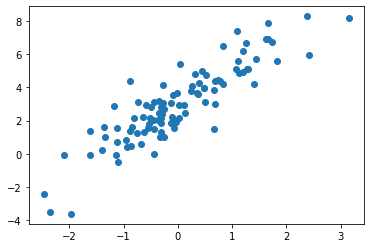

In [30]:
# посмотрим, что у нас за данные
plt.plot(x, y_true, 'o')
plt.show()


**Добавление свободного члена**

Поскольку наша регрессия имеет свободный член, к матрице $X$ нужно приписать столбец, состоящий из одних единиц. В данном случае мы использовали функцию `np.ones_like()`, генерирующую объект с такими же измерениями, как и его аргумент, заполненный единицами. В данном случае мы попросили сделать вектор такой же длины, как $x$, но заполненный единицами. `np.array` в данном случае создаёт матрицу из списка списков, считая, что она записана по строкам; чтобы её записать по столбцам, мы применили транспонирование.

In [31]:
X = np.array([x, np.ones_like(x)]).T

In [32]:
# посмотрим теперь на первые 5 примеров
X[:5]

array([[-0.30626346,  1.        ],
       [-1.62802463,  1.        ],
       [ 3.14754826,  1.        ],
       [-0.87912051,  1.        ],
       [-0.51804225,  1.        ]])

In [33]:
y_true.shape

(100,)

In [34]:
# Задание 1. Реализуйте среднеквадратичную функцию потерь
def mse(y_true, y_pred):
    if len(y_true) != len(y_pred):
        return 0
    diff = 0
    for i in range(len(y_true)):
        diff += (y_true[i] - y_pred[i])**2
    return diff/len(y_true)
mse(y_true, y_pred)

1.0953694788317305

In [36]:
# Задание 2. Реализуйте градиентный спуск для синтетических данных своими руками
loss = 0
min_error = 0.05
# a. Инициализируйте вектор весов
w = [1 for i in range(100)]
# b. Объявите константу темпа обучения (Чаще всего значения лежат в промежутке [0.01, 0.0001])
eta = 0.001
# До схождения...
while True:
    # c. Операция скалярного произведения признаков и весов
    y_pred = y_pred * w
    # d. Расчет MSE
    loss = mse(y_true, y_pred)
    # e. Расчет градиента (градиент должен того же самого .shape, что и веса)
    grad = np.gradient(y_pred)
    # f. Двигаем веса в сторону градиента
    w -= eta * grad
    if loss >= min_error:
        break
print(f'Loss is {loss}.\nGrad is {grad}.\nWeights are {w}.\n')

Loss is 1.0953694788317305.
Grad is [-2.64352234  3.45381172  0.74890412 -3.66559051  0.34924651  0.21609776
  2.19051255  1.58431213 -0.91467839 -1.23684873 -1.47356137 -2.39816041
 -0.63843675  2.87718486  1.04130681 -1.45474644  0.06585319 -0.18224239
  0.18482513  0.44012398 -0.03263074  0.58719723 -1.01941389 -0.21718631
  1.09093721  0.17466394  0.50816447  1.5632869  -0.08912731 -1.68343169
  0.91190117  0.26208422 -0.6356098  -0.63286545  1.71308024  1.72020303
 -2.64075769 -1.85265723  1.47319677  2.41100544 -1.09834854 -1.18574886
 -2.57382284 -0.44919618  3.2923261  -0.46316634 -0.83696095  0.09516969
  0.70093287  2.08519686  1.14410775 -2.04780093 -2.28260632 -1.1033561
  1.5717854   0.94135169 -0.68615594 -1.50923605 -0.51850224  2.33741563
 -0.36753175 -0.67438658 -0.49933938  0.62107108 -0.22772966  0.35941052
 -0.1652779  -0.79622555  0.76119707  0.36807145  0.94323557 -1.38616186
 -1.0114335   1.84039185  1.47484876 -1.50689583 -1.95231257 -0.06366613
  2.52107944  0.

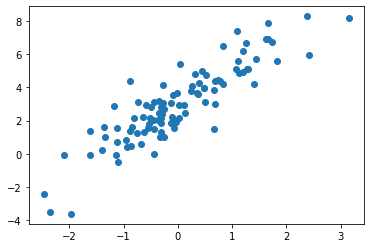

In [38]:
# Можно вывести итоговую линию регрессии 

plt.plot(X[:, 0], y_true, 'o')
#plt.plot(X[:, 0], X.dot(w), color="blue", linewidth=3)
plt.show()

__Задание 3: изучить следующий [jupyter notebook](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem02-sklearn-linregr.ipynb)__

__Задание 4: на основе предыдущего ноутбука сделать анализ данных и моделирование на датасете__ Real estate.csv

In [130]:
data = pd.read_csv('Real estate.csv')

In [131]:
data.sample(2)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
129,130,2013.417,38.5,216.8329,7,24.98086,121.54162,41.0
391,392,2013.583,6.2,1939.7490,1,24.95155,121.55387,31.3


In [132]:
data = data.rename(columns = {'X4 number of convenience stores' : 'X4'})

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

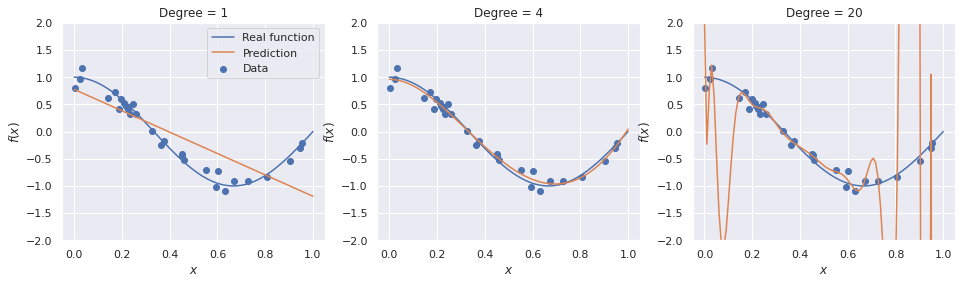

In [134]:
from sklearn.linear_model import LinearRegression

np.random.seed(36)
x = np.linspace(0, 1, 100)
y = np.cos(1.5 * np.pi * x)

x_objects = np.random.uniform(0, 1, size=30)
y_objects = np.cos(1.5 * np.pi * x_objects) + np.random.normal(scale=0.1, size=x_objects.shape)

from sklearn.preprocessing import PolynomialFeatures
fig, axs = plt.subplots(figsize=(16, 4), ncols=3)
for i, degree in enumerate([1, 4, 20]):
    X_objects = PolynomialFeatures(degree, include_bias=False).fit_transform(x_objects[:, None])
    X = PolynomialFeatures(degree, include_bias=False).fit_transform(x[:, None])
    regr = LinearRegression().fit(X_objects, y_objects)
    y_pred = regr.predict(X)
    axs[i].plot(x, y, label="Real function")
    axs[i].scatter(x_objects, y_objects, label="Data")
    axs[i].plot(x, y_pred, label="Prediction")
    if i == 0:
        axs[i].legend()
    axs[i].set_title("Degree = %d" % degree)
    axs[i].set_xlabel("$x$")
    axs[i].set_ylabel("$f(x)$")
    axs[i].set_ylim(-2, 2)

In [135]:
data.shape

(414, 8)

In [136]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station', 'X4', 'X5 latitude',
       'X6 longitude', 'Y house price of unit area'],
      dtype='object')

In [137]:
from sklearn.model_selection import train_test_split

data = data.drop(columns=["No"])

y = data["Y house price of unit area"]
X = data.drop(columns=["Y house price of unit area"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

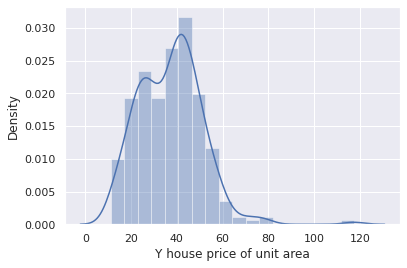

In [138]:
sns.distplot(y_train)

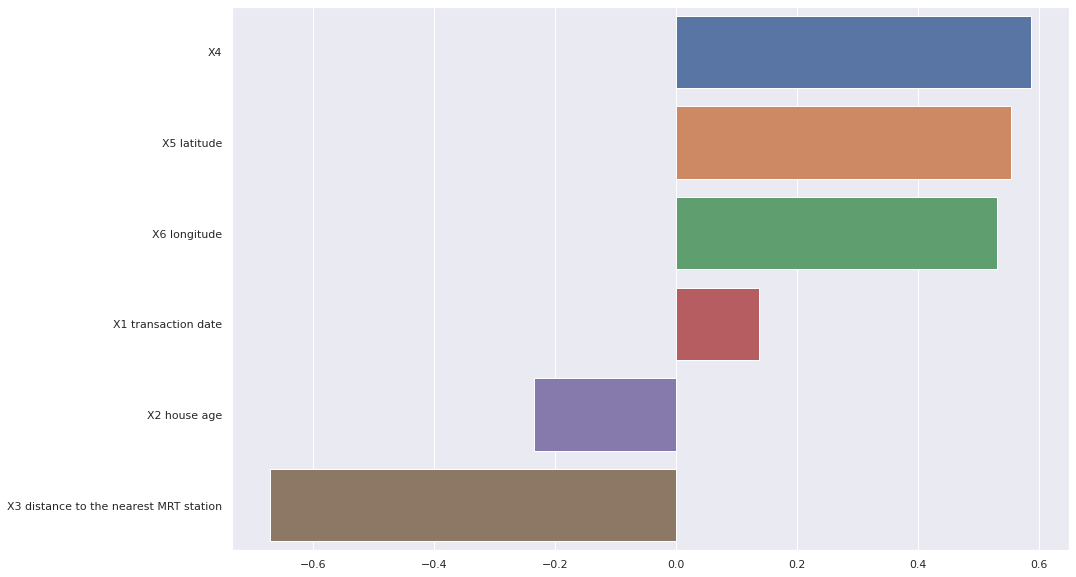

In [139]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

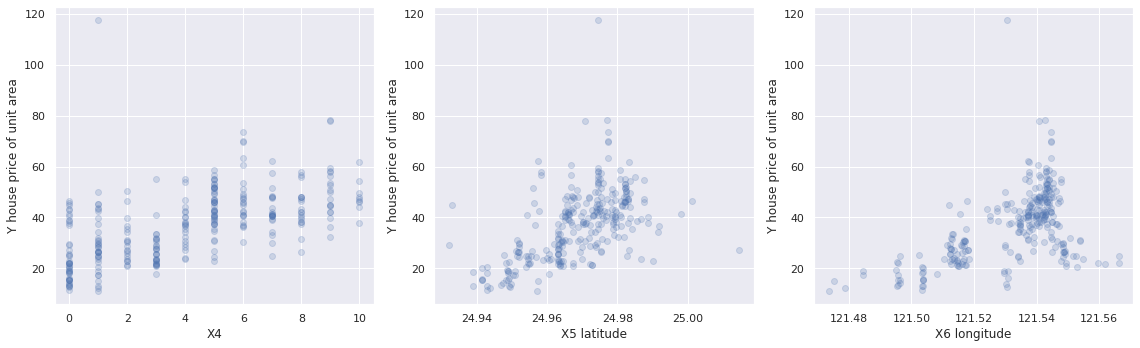

In [140]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, feature in enumerate(["X4", "X5 latitude", "X6 longitude"]):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Y house price of unit area")
plt.tight_layout()

In [141]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 9.0322
Train RMSE = 9.1000


In [142]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=10, scoring="neg_root_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -8.9537
	-6.5138
	-10.6971
	-5.6050
	-15.7718
	-7.2945
	-8.0797
	-9.9114
	-7.0068
	-8.3612
Mean CV MSE = 8.8195


In [143]:
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(
    rmse,
    greater_is_better=False
)

In [144]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=10, scoring=rmse_scorer)
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV RMSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -8.9537
	-6.5138
	-10.6971
	-5.6050
	-15.7718
	-7.2945
	-8.0797
	-9.9114
	-7.0068
	-8.3612
Mean CV RMSE = 8.8195


In [145]:
best_constant = y_train.mean()
print("Test RMSE with best constant = %.4f" % mean_squared_error(y_test, best_constant * np.ones(y_test.shape),
                                                                 squared=False))
print("Train RMSE with best constant = %.4f" % mean_squared_error(y_train, best_constant * np.ones(y_train.shape),
                                                                  squared=False))

Test RMSE with best constant = 13.0844
Train RMSE with best constant = 13.8363


In [146]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

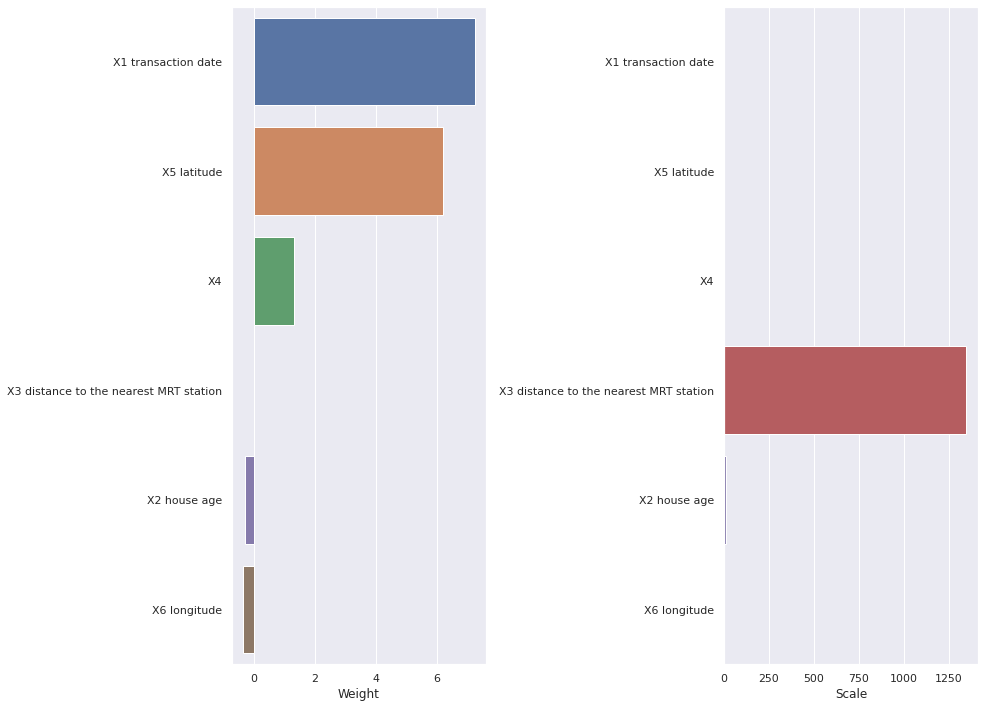

In [147]:
show_weights(numeric_features, model.coef_, X_train[numeric_features].std())

In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 8.7478
Train RMSE = 8.8444


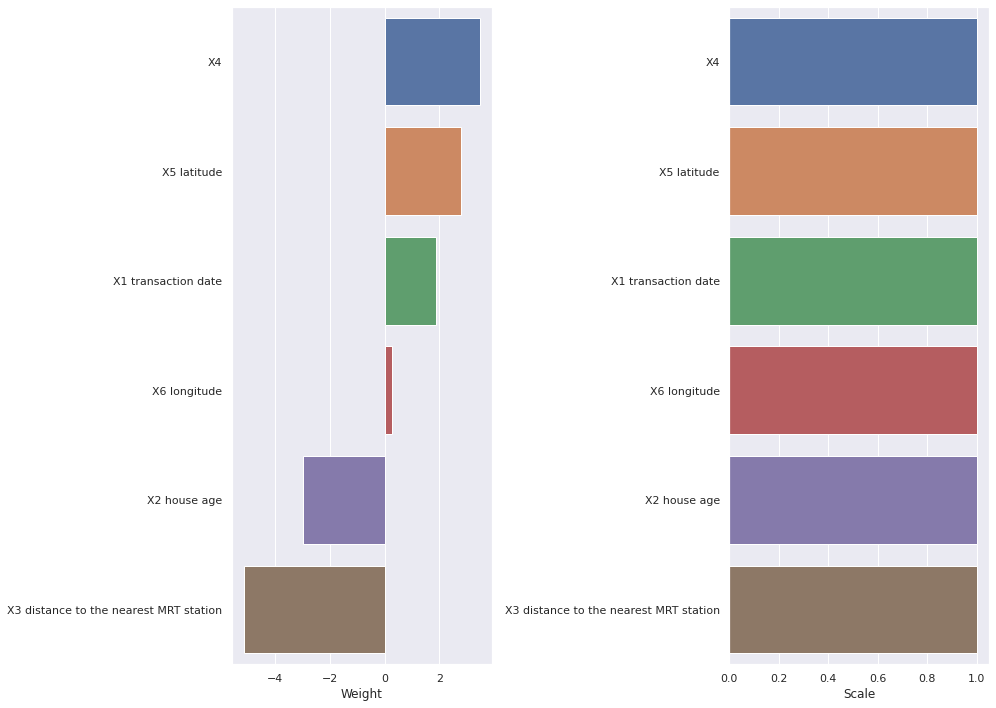

In [149]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, scales)

Best alpha = 7.8476


Text(0, 0.5, 'CV score')

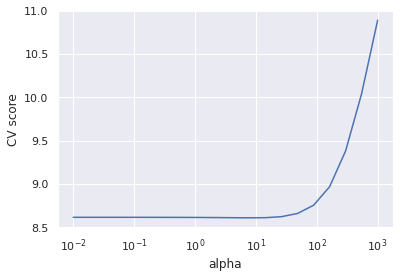

In [150]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [151]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 8.7692


In [152]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [153]:
X_train[categorical].sample(5)

""
299
348
106
319
58


In [154]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 8.7478


In [155]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (289, 6)
Size after OneHot: (289, 6)


In [156]:
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

RMSE = 8.8416


In [157]:
ridge_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Ridge: 0
Zero weights in Lasso: 1


Best alpha = 0.0207


Text(0, 0.5, 'CV score')

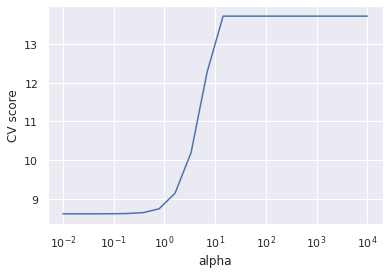

In [158]:
alphas = np.logspace(-2, 4, 20)
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [159]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 8.7426


In [160]:
lasso_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Lasso: 0


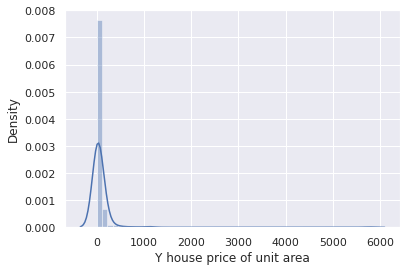

In [161]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)

In [162]:
mask = (error < np.quantile(error, 0.95))

In [163]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 8.8413


In [164]:
X_train = X_train[mask]
y_train = y_train[mask]

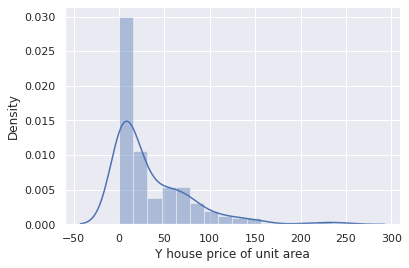

In [165]:
error = (y_train[mask] - model.predict(X_train[mask])) ** 2
sns.distplot(error)

In [166]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 8.8448


Text(0, 0.5, 'Y house price of unit area')

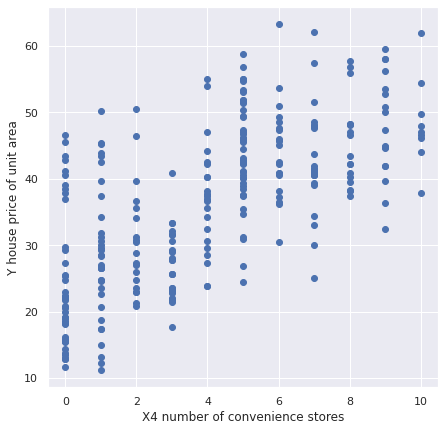

In [167]:
plt.figure(figsize=(7, 7))
plt.scatter(X_train.X4, y_train)
plt.xlabel('X4 number of convenience stores')
plt.ylabel('Y house price of unit area')

In [168]:
threshold = 5
mask = (X_train.X4 <= threshold)
X_train_1 = X_train[mask]
y_train_1 = y_train[mask]
X_train_2 = X_train[~mask]
y_train_2 = y_train[~mask]

In [170]:
column_transformer1 = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline1 = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer1),
    ('regression', Ridge())
])

column_transformer2 = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline2 = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer2),
    ('regression', Ridge())
])



model1 = pipeline1.fit(X_train_1, y_train_1)
model2 = pipeline2.fit(X_train_2, y_train_2)

y_pred_1 = model1.predict(X_test)
y_pred_2 = model2.predict(X_test)
mask_test = (X_test.X4 <= threshold)
y_pred = y_pred_1.copy()
y_pred[~mask_test] = y_pred_2[~mask_test]

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 8.5522


In [171]:
from sklearn.preprocessing import KBinsDiscretizer

(-2.0, 2.0)

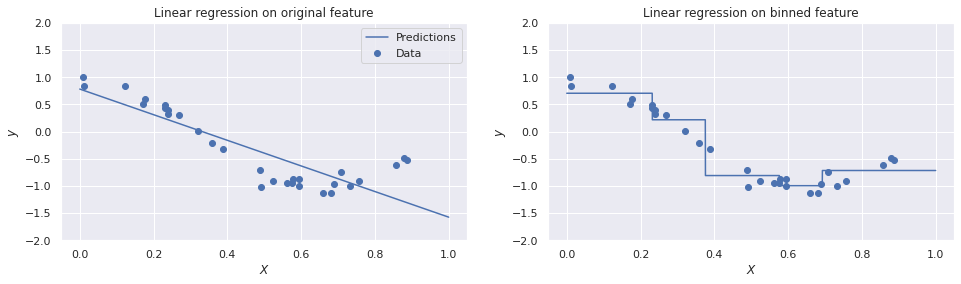

In [172]:
x_plot = np.linspace(0, 1, 10000)

X = np.random.uniform(0, 1, size=30)
y = np.cos(1.5 * np.pi * X) + np.random.normal(scale=0.1, size=X.shape)

fig, axs = plt.subplots(figsize=(16, 4), ncols=2)

regr = LinearRegression()
regr.fit(X[:, np.newaxis], y)
y_pred_regr = regr.predict(x_plot[:, np.newaxis])
axs[0].scatter(X[:, np.newaxis], y, label="Data")
axs[0].plot(x_plot, y_pred_regr, label="Predictions")
axs[0].legend()
axs[0].set_title("Linear regression on original feature")
axs[0].set_xlabel("$X$")
axs[0].set_ylabel("$y$")
axs[0].set_ylim(-2, 2)

binner = KBinsDiscretizer(n_bins=5, strategy='quantile')
pipeline = Pipeline(steps=[
    ('binning', binner),
    ('regression', LinearRegression())
])
pipeline.fit(X[:, np.newaxis], y)
y_pred_binned = pipeline.predict(x_plot[:, np.newaxis])
axs[1].scatter(X[:, np.newaxis], y, label="Data")
axs[1].plot(x_plot, y_pred_binned, label="Predictions")
axs[1].set_title("Linear regression on binned feature")
axs[1].set_xlabel("$X$")
axs[1].set_ylabel("$y$")
axs[1].set_ylim(-2, 2)

Text(0, 0.5, '$y$')

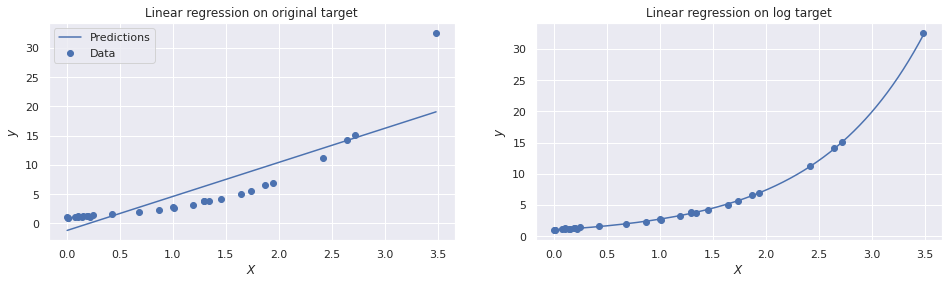

In [173]:
X = np.random.exponential(1, size=30)
y = np.exp(X) + np.random.normal(scale=0.1, size=X.shape)

x_plot = np.linspace(np.min(X), np.max(X), 10000)

fig, axs = plt.subplots(figsize=(16, 4), ncols=2)

regr = LinearRegression()
regr.fit(X[:, np.newaxis], y)
y_pred_regr = regr.predict(x_plot[:, np.newaxis])
axs[0].scatter(X[:, np.newaxis], y, label="Data")
axs[0].plot(x_plot, y_pred_regr, label="Predictions")
axs[0].legend()
axs[0].set_title("Linear regression on original target")
axs[0].set_xlabel("$X$")
axs[0].set_ylabel("$y$")

y_log = np.log(y)
regr.fit(X[:, np.newaxis], y_log)
y_pred_log = np.exp(regr.predict(x_plot[:, np.newaxis]))
axs[1].scatter(X[:, np.newaxis], y, label="Data")
axs[1].plot(x_plot, y_pred_log, label="Predictions")
axs[1].set_title("Linear regression on log target")
axs[1].set_xlabel("$X$")
axs[1].set_ylabel("$y$")

In [174]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import QuantileTransformer, quantile_transform
from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [175]:
dataset = load_boston()
target = np.array(dataset.feature_names) == "DIS"
X = dataset.data[:, np.logical_not(target)]
y = dataset.data[:, target].squeeze()
y_trans = quantile_transform(dataset.data[:, target],
                             n_quantiles=300,
                             output_distribution='normal',
                             copy=True).squeeze()

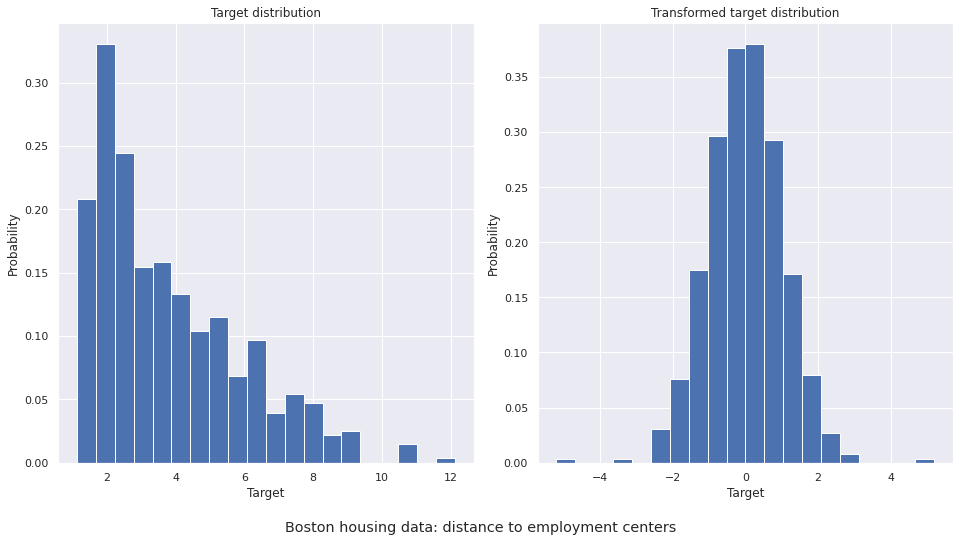

In [176]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,8))

ax0.hist(y, bins=20, density=True)
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')

ax1.hist(y_trans, bins=20, density=True)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.set_title('Transformed target distribution')

f.suptitle("Boston housing data: distance to employment centers", y=0.035)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Test MAE without target transformation = 0.8837
Test RMSE without target transformation = 1.1565
Test MAE with target transformation = 0.8093
Test RMSE with target transformation = 1.1548


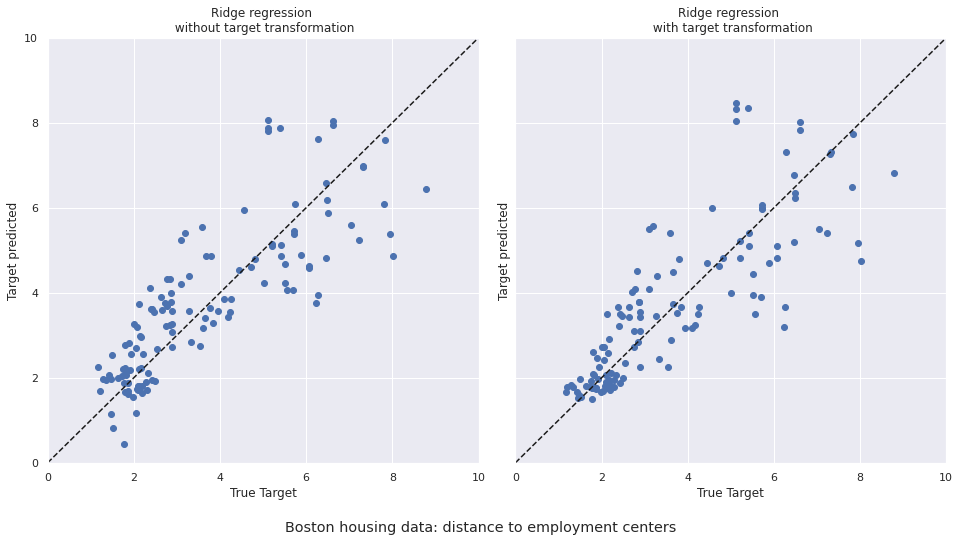

In [177]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True, figsize=(15,8))

regr = RidgeCV()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("Test MAE without target transformation = %.4f" % mean_absolute_error(y_test, y_pred))
print("Test RMSE without target transformation = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

ax0.scatter(y_test, y_pred)
ax0.plot([0, 10], [0, 10], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Ridge regression \n without target transformation')
ax0.set_xlim([0, 10])
ax0.set_ylim([0, 10])

regr_trans = TransformedTargetRegressor(
    regressor=RidgeCV(),
    transformer=QuantileTransformer(n_quantiles=300,
                                    output_distribution='normal'))
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)

print("Test MAE with target transformation = %.4f" % mean_absolute_error(y_test, y_pred))
print("Test RMSE with target transformation = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

ax1.scatter(y_test, y_pred)
ax1.plot([0, 10], [0, 10], '--k')
ax1.set_ylabel('Target predicted')
ax1.set_xlabel('True Target')
ax1.set_title('Ridge regression \n with target transformation')
ax1.set_xlim([0, 10])
ax1.set_ylim([0, 10])

f.suptitle("Boston housing data: distance to employment centers", y=0.035)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])